# Dự đoán khả năng khách hàng rời bỏ

Mục tiêu của dự án là xây dựng mô hình học máy để dự đoán khả năng khách hàng rời bỏ dịch vụ, dựa trên dữ liệu lịch sử. Việc này giúp doanh nghiệp phát hiện sớm các khách hàng có nguy cơ rời bỏ và có chiến lược giữ chân phù hợp.


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings("ignore")


In [13]:
df = pd.read_csv('sampleSubmission.csv')
df.head()


,id,churn
0,1,yes
1,2,no
2,3,no
3,4,yes
4,5,yes


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      750 non-null    int64 
 1   churn   750 non-null    object
dtypes: int64(1), object(1)
memory usage: 11.8+ KB
None

Phân phối biến mục tiêu (churn):
churn
no     463
yes    287
Name: count, dtype: int64


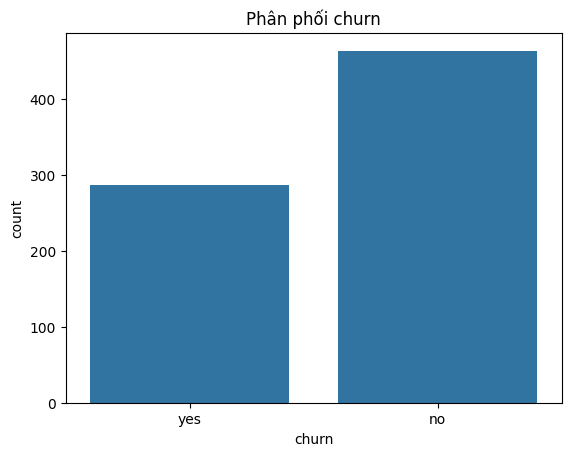

In [14]:
# Thông tin cơ bản
print(df.info())
print("\nPhân phối biến mục tiêu (churn):")
print(df['churn'].value_counts())

# Biểu đồ churn
sns.countplot(x='churn', data=df)
plt.title('Phân phối churn')
plt.show()


In [ ]:
# Mã hoá các cột object
cat_cols = df.select_dtypes(include='object').columns
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

df.head()


In [ ]:
X = df.drop('churn', axis=1)
y = df['churn']

# Chia dữ liệu
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Chuẩn hoá
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
# Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)


In [ ]:
# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)


In [ ]:
print("🔹 Logistic Regression Report:\n")
print(classification_report(y_test, y_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))


In [ ]:
print("🔹 Random Forest Report:\n")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))


## Tổng kết

- Mô hình Random Forest cho kết quả tốt hơn so với Logistic Regression ở độ chính xác và độ bao phủ.
- Có thể nâng cấp mô hình bằng cách:
  - Thử thêm các thuật toán như XGBoost, LightGBM
  - Tối ưu hoá tham số (GridSearchCV)
  - Cân bằng dữ liệu nếu mất cân bằng lớp (sử dụng SMOTE)

Việc dự đoán chính xác khách hàng rời bỏ có thể giúp doanh nghiệp có chiến lược giữ chân hiệu quả hơn.
